<a href="https://colab.research.google.com/github/Rtrey29/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

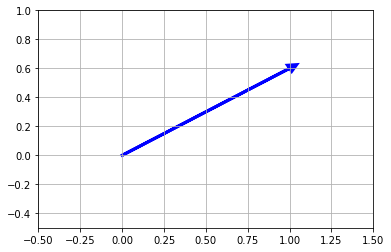

In [0]:

plt.xlim(-.5,1.5)          
plt.ylim(-.5,1)


a = [1,.6] 


# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')

plt.grid(True)
plt.show()

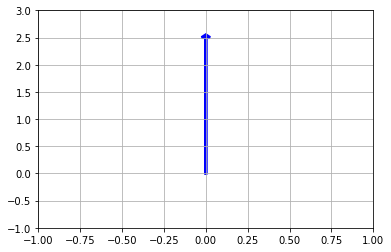

In [0]:

plt.xlim(-1,1)          
plt.ylim(-1,3)


a = [0,2.5] 
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.grid(True)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

 a function is a mapping from a set of inputs to a set of outputs where no two inputs is mapped to the same output.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is the only one that is a function.  Functions can not have duplicated x values

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

function1: 3D to 3D

function2: 4D to 2D

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
p(\begin{bmatrix} 1\\ 0 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}=\begin{bmatrix} 1\\-1\end{bmatrix} 
\\
\\
p(\begin{bmatrix}0 \\ 1 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix} = \begin{bmatrix} 3\\2\end{bmatrix} 
\\
\\
T = \begin{bmatrix}1&3\\-1&2\end{bmatrix}
\\
\\
q(\begin{bmatrix}1 \\ 0 \\ 0\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix} = \begin{bmatrix} 4 \\ -1 \\ 5\end{bmatrix}
\\
\\q(\begin{bmatrix}0 \\1 \\ 0\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \\ 1\end{bmatrix}
\\
\\q(\begin{bmatrix}0 \\0 \\ 1\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix} = \begin{bmatrix} 2 \\3 \\ -2\end{bmatrix}
\\
\\T= \begin{bmatrix}4&1&2\\-1&2&3\\5&1&-2\end{bmatrix}
\end{align}



## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
t1 = np.array([[1,3], [-1,2]])
t2 = np.array([[4,1,2], [-1,2,3], [5,1,-2]])
im1 = np.array([3,4])
im2 = np.array([3,4,5])
pmul = np.matmul(t1,im1)
qmul = np.matmul(t2, im2)
print(pmul)
qmul

[15  5]


array([26, 20,  9])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

An eigenvector is a vector that doesn't change it's orientation during a transformation, but can still be scaled.

An eigenvalue is the value that determines how much scaling will occur to the eigenvector.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Difficulty with visualizations on anything above 3D, searching the space gets exponentially harder with more dimensions, diminishing returns with added features, increased redundancy, increased computational workload, and the potential for overfitting if the number of features outnumber the total observation count.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

5 times as many observations than paramaters
###N=5P

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
iris = iris.drop(columns = ['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
# get the mean
irismean = iris.mean()



In [0]:
# get the mean of v1
iris_mean = iris.mean()
print('Mean: \n', iris_mean)

# distance of iris is the value - mean
iris_dist = iris - iris_mean

# square the distance from the mean
iris_sq_dist = iris_dist**2

# sum the squared distances and divide by the number of observations
iris_variance = iris_sq_dist.sum()/len(iris)
print('Variance: \n', iris_variance)

# square root of the variance is the standard deviation
iris_std_dev = np.sqrt(iris_variance)
print('Standard Deviation: \n', iris_std_dev)




Mean: 
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64
Variance: 
 sepal_length    0.681122
sepal_width     0.186751
petal_length    3.092425
petal_width     0.578532
dtype: float64
Standard Deviation: 
 sepal_length    0.825301
sepal_width     0.432147
petal_length    1.758529
petal_width     0.760613
dtype: float64


In [0]:
iris_dist

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667
5,-0.443333,0.846,-2.058667,-0.798667
6,-1.243333,0.346,-2.358667,-0.898667
7,-0.843333,0.346,-2.258667,-0.998667
8,-1.443333,-0.154,-2.358667,-0.998667
9,-0.943333,0.046,-2.258667,-1.098667


In [0]:
iris_cov = iris_dist.cov()

In [0]:
values,vectors = np.linalg.eig(iris_cov)


In [62]:
values 

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [61]:
vectors

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [63]:
vectors = vectors[:,[0,1]]
vectors

array([[ 0.36158968, -0.65653988],
       [-0.08226889, -0.72971237],
       [ 0.85657211,  0.1757674 ],
       [ 0.35884393,  0.07470647]])

In [65]:
p = vectors.T.dot(iris_dist.T)
p.T

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456],
       [-2.27989736, -0.74778271],
       [-2.82089068,  0.08210451],
       [-2.62648199, -0.17040535],
       [-2.88795857,  0.57079803],
       [-2.67384469,  0.1066917 ],
       [-2.50652679, -0.65193501],
       [-2.61314272, -0.02152063],
       [-2.78743398,  0.22774019],
       [-3.22520045,  0.50327991],
       [-2.64354322, -1.1861949 ],
       [-2.38386932, -1.34475434],
       [-2.6225262 , -0.81808967],
       [-2.64832273, -0.31913667],
       [-2.19907796, -0.87924409],
       [-2.58734619, -0.52047364],
       [-2.3105317 , -0.39786782],
       [-2.54323491, -0.44003175],
       [-3.21585769, -0.14161557],
       [-2.30312854, -0.10552268],
       [-2.35617109,  0.03120959],
       [-2.50791723,  0.13905634],
       [-2.469056  , -0.13788731],
       [-2.56239095, -0.37468456],
       [-2.63982127,

In [0]:
x = p.T[:,0]
y = p.T[:,1]


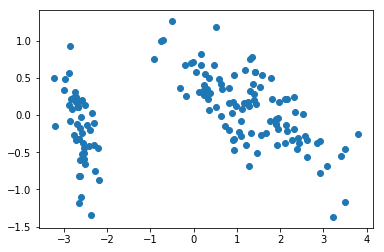

In [70]:
plt.scatter(x,y)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [73]:
pca.fit(iris)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [74]:
b = pca.transform(iris)
b

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [0]:
plt.scatter()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)